# Xanadu Pennylane Workshop Code

In [10]:
# Step 0 - Import
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Step 1 - Get your data ready
X = np.linspace(0,2*np.pi,10)
X.requires_grad = False
X_test = np.linspace(0+0.2,2*np.pi+0.2,10)

In [12]:
# Step 2
dev = qml.device('lightning.qubit',wires=1)
# dev = qml.device('qiskit.aer',wires=1) # uncomment this line if you want to use qiskit

(<Figure size 500x200 with 1 Axes>, <Axes: >)

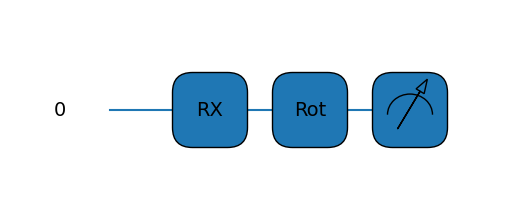

In [13]:
# Step 3
@qml.qnode(dev)
def circuit(x,params):
    qml.RX(x,wires=0)
    qml.Rot(params[0],params[1],params[2],wires=0)
    return qml.expval(qml.PauliZ(wires=0))
qml.draw_mpl(circuit)(0.1,[0.1,0.1,0.1])

In [14]:
# Step 4
def loss(Y,predictions):
    total_loss=0
    for y,p in zip(Y,predictions):
        total_loss += (y-p)**2
    return total_loss

In [15]:
# Step 5
def cost(X,params):
    predictions = [circuit(x,params) for x in X]
    Y = np.sin(X)
    cost = loss(Y,predictions)
    return cost

In [16]:
# Step 6
opt = qml.GradientDescentOptimizer(stepsize=0.1)

params = np.array([0.1,0.1,0.1],requires_grad=True)

for it in range(100):
    X_and_params , prev_cost = opt.step_and_cost(cost,X,params)
    params = X_and_params[1]
    if it%10==0:
        print(f'Step: {it}, Cost: {cost(X,params)}')
        

Step: 0, Cost: 9.932888918479078
Step: 10, Cost: 0.015055887192330886
Step: 20, Cost: 0.0034863357216069106
Step: 30, Cost: 0.001527156990607967
Step: 40, Cost: 0.0008553695091742038
Step: 50, Cost: 0.0005467278033679703
Step: 60, Cost: 0.0003795931092589549
Step: 70, Cost: 0.0002789505418953798
Step: 80, Cost: 0.00021366166602075257
Step: 90, Cost: 0.0001689025401588072


In [17]:
# Step 7
print(params)

[-1.46519326  1.57079633  0.1       ]


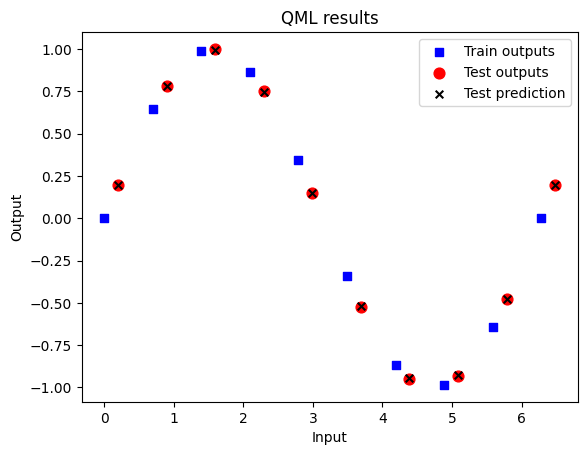

In [18]:
# Step 8
test_predictions =[]
for x_test in X_test:
    prediction = circuit(x_test,params)
    test_predictions.append(prediction)
    
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(X, np.sin(X), s=30, c='b', marker="s", label='Train outputs')
ax1.scatter(X_test, np.sin(X_test), s=60, c='r', marker="o", label='Test outputs')
ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test prediction')
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("QML results")

plt.legend(loc='upper right')
plt.show()